<div align="center">
  <h1>Gender Bias in Earnings Across Different Industries</h1>
  <h3>Haoyiwen Guo and Meiyi Zhong</h3>
</div>

### Median Earnings Gap Between Men and Women in Different Industries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
industry_data = pd.read_csv('Data/median_earning.csv', skiprows = 45, nrows = 20)
industry_data.columns = ['Industry', 'Median earnings (dollars) - Total', 'Median earnings (dollars) - Total - Margin of Error', 'Median earnings (dollars) - Male', 'Median earnings (dollars) - Male - Margin of Error', 'Median earnings (dollars) - Female', 'Median earnings (dollars) - Female - Margin of Error', 'Women\'s earnings as a percentage of men\'s earnings', 'Women\'s earnings as a percentage of men\'s earnings - Margin of Error']
industry_data = industry_data[["Industry", "Median earnings (dollars) - Male", "Median earnings (dollars) - Female"]]

industry_data.columns = ['Industry', 'Male', 'Female']

# Remove "(X)" entries
industry_data = industry_data[industry_data['Male'] != '(X)']
industry_data = industry_data[industry_data['Female'] != '(X)']

# Convert columns to numeric
industry_data['Male'] = industry_data['Male'].str.replace(',', '').astype(float)
industry_data['Female'] = industry_data['Female'].str.replace(',', '').astype(float)

# Calculate earnings gap
industry_data['Earnings Gap'] = industry_data['Male'] - industry_data['Female']

industry_data

,Industry,Male,Female,Earnings Gap
0,"Agriculture, forestry, fishing and hun...",43989.0,35136.0,8853.0
1,"Mining, quarrying, and oil and gas ext...",80462.0,76784.0,3678.0
2,Construction,54413.0,52478.0,1935.0
3,Manufacturing,63450.0,50795.0,12655.0
4,Wholesale trade,63033.0,52228.0,10805.0
5,Retail trade,45929.0,37207.0,8722.0
6,Transportation and warehousing,56932.0,44761.0,12171.0
7,Utilities,88513.0,72963.0,15550.0
8,Information,89547.0,70285.0,19262.0
9,Finance and insurance,101653.0,62358.0,39295.0


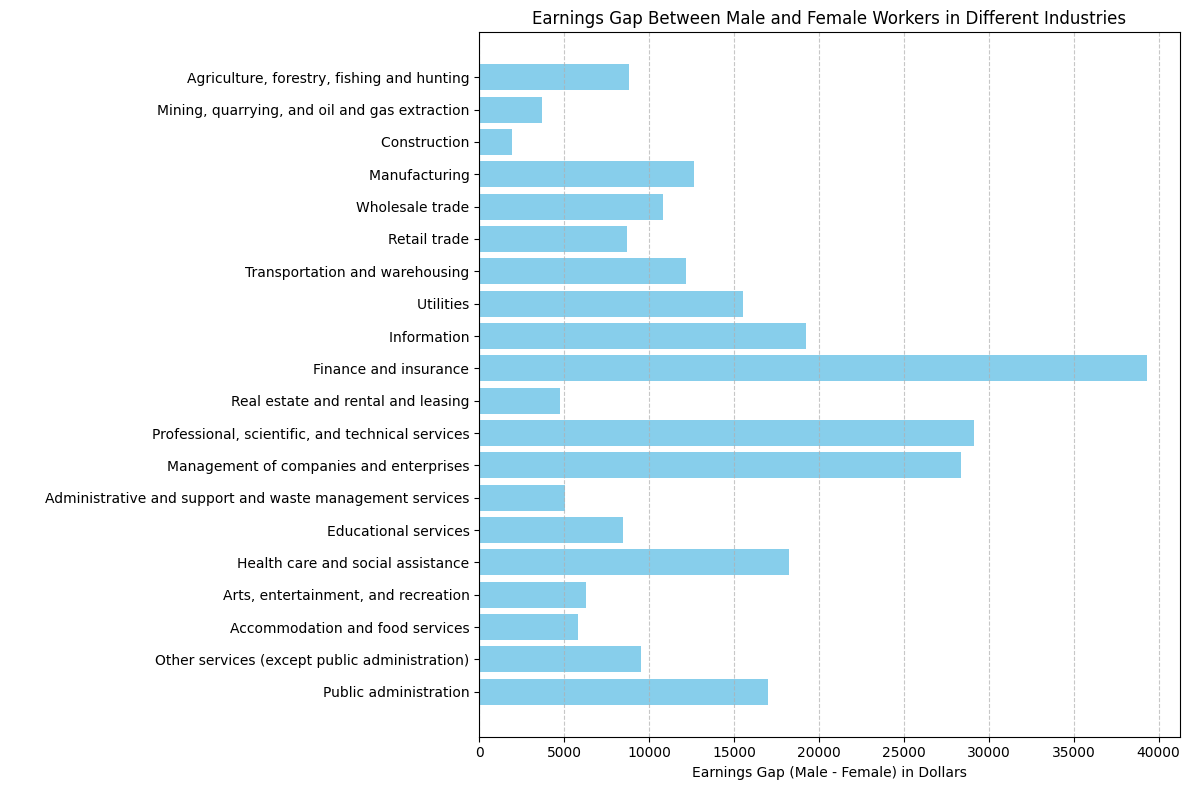

In [ ]:
# Plotting
plt.figure(figsize = (12, 8))
plt.barh(industry_data['Industry'], industry_data['Earnings Gap'], color='skyblue')
plt.xlabel('Earnings Gap (Male - Female) in Dollars')
plt.title('Earnings Gap Between Male and Female Workers in Different Industries')
plt.gca().invert_yaxis() 
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

### Example: Gender Bias in Earnings in STEM Fields

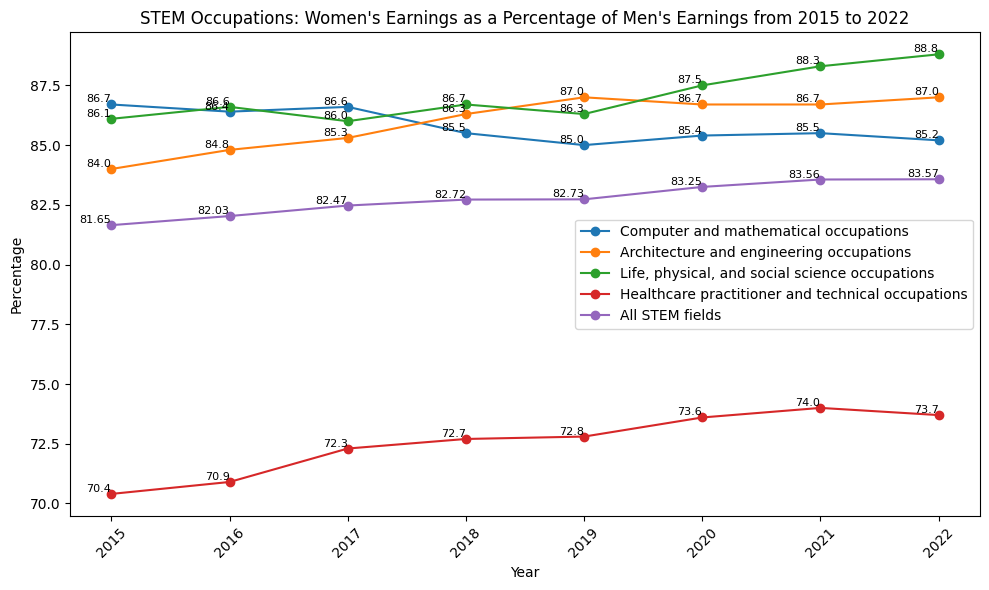

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('Data/STEM.csv')
df.set_index('Occupations', inplace=True)
# Transpose the dataframe to have years as rows and occupations as columns
df = df.T

# Plotting
plt.figure(figsize=(10, 6))
# Plot each occupation's data and annotate points with values
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)
    for i, value in enumerate(df[column]):
        plt.text(df.index[i], value, str(value), ha = 'right', va = 'bottom', fontsize = 8)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('STEM Occupations: Women\'s Earnings as a Percentage of Men\'s Earnings from 2015 to 2022')
plt.legend()
plt.xticks(df.index, rotation=45)
plt.tight_layout()
plt.show()

### Impact of the Intersection of Gender and Other Factors on Earnings

In [ ]:
# Race and gender
race_data = pd.read_csv('Data/median_earning.csv', skiprows = 3, nrows = 6)
race_data.columns = ['Race', 'Median earnings (dollars) - Total', 'Median earnings (dollars) - Total - Margin of Error', 'Median earnings (dollars) - Male', 'Median earnings (dollars) - Male - Margin of Error', 'Median earnings (dollars) - Female', 'Median earnings (dollars) - Female - Margin of Error', 'Women\'s earnings as a percentage of men\'s earnings', 'Women\'s earnings as a percentage of men\'s earnings - Margin of Error']
race_data = race_data.drop(columns=['Median earnings (dollars) - Total', 'Median earnings (dollars) - Total - Margin of Error', 'Median earnings (dollars) - Male - Margin of Error', 'Median earnings (dollars) - Female - Margin of Error'])
race_data['Median earnings (dollars) - Male'] = race_data['Median earnings (dollars) - Male'].str.replace(',', '').astype(float)
race_data['Median earnings (dollars) - Female'] = race_data['Median earnings (dollars) - Female'].str.replace(',', '').astype(float)

In [ ]:
race_data.iloc[:, :3]

,Race,Median earnings (dollars) - Male,Median earnings (dollars) - Female
0,White,68677.0,54453.0
1,Black or African American,50001.0,44131.0
2,American Indian and Alaska Native,45036.0,41228.0
3,Asian,83743.0,66693.0
4,Native Hawaiian and Other Pacific ...,51510.0,45926.0
5,Some other race,44352.0,38219.0


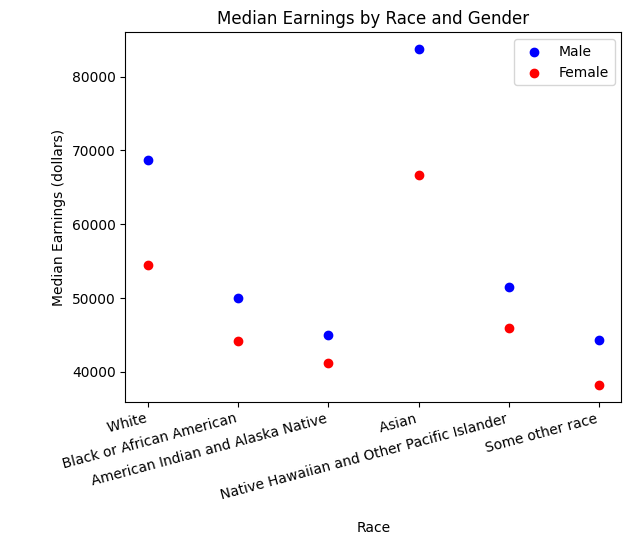

In [ ]:
import pandas as pd
plt.scatter(race_data['Race'], race_data['Median earnings (dollars) - Male'], color='blue', label='Male')
plt.scatter(race_data['Race'], race_data['Median earnings (dollars) - Female'], color='red', label='Female')
plt.xlabel('Race')
plt.ylabel('Median Earnings (dollars)')
plt.title('Median Earnings by Race and Gender')
plt.xticks(rotation=15, ha='right')
plt.legend()
plt.show()

In [ ]:
# Education and gender
education_data = pd.read_csv('Data/median_earning.csv', skiprows = 14, nrows = 5)
education_data.columns = ['Education Attainment', 'Median earnings (dollars) - Total', 'Median earnings (dollars) - Total - Margin of Error', 'Median earnings (dollars) - Male', 'Median earnings (dollars) - Male - Margin of Error', 'Median earnings (dollars) - Female', 'Median earnings (dollars) - Female - Margin of Error', 'Women\'s earnings as a percentage of men\'s earnings', 'Women\'s earnings as a percentage of men\'s earnings - Margin of Error']
education_data = education_data.drop(columns=['Median earnings (dollars) - Total', 'Median earnings (dollars) - Total - Margin of Error', 'Median earnings (dollars) - Male - Margin of Error', 'Median earnings (dollars) - Female - Margin of Error'])
education_data['Median earnings (dollars) - Male'] = education_data['Median earnings (dollars) - Male'].str.replace(',', '').astype(float)
education_data['Median earnings (dollars) - Female'] = education_data['Median earnings (dollars) - Female'].str.replace(',', '').astype(float)

In [ ]:
education_data.iloc[:, :3]

,Education Attainment,Median earnings (dollars) - Male,Median earnings (dollars) - Female
0,Less than high school graduate,35428.0,23370.0
1,High school graduate (includes equival...,43403.0,30411.0
2,Some college or associate's degree,53020.0,36994.0
3,Bachelor's degree,78869.0,54913.0
4,Graduate or professional degree,103049.0,72582.0


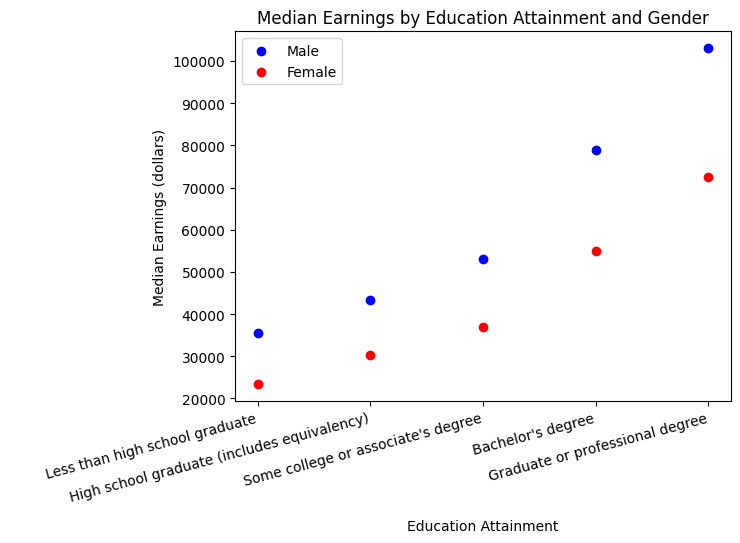

In [ ]:
plt.scatter(education_data['Education Attainment'], education_data['Median earnings (dollars) - Male'],color='blue', label='Male')

plt.scatter(education_data['Education Attainment'], education_data['Median earnings (dollars) - Female'], color='red', label='Female')
plt.xlabel('Education Attainment')
plt.ylabel('Median Earnings (dollars)')
plt.title('Median Earnings by Education Attainment and Gender')
plt.xticks(rotation=15, ha='right')
plt.legend()
# Show plot
plt.show()

### Income Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
data = pd.read_csv('Data/income.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


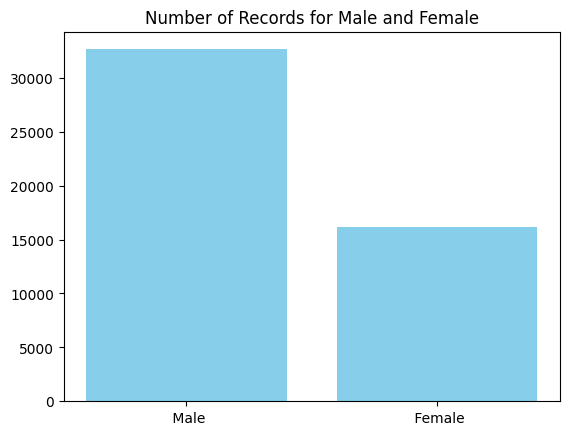

In [ ]:
gender_counts = data['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color = 'skyblue')

# Add title and labels
plt.title('Number of Records for Male and Female')
plt.show()

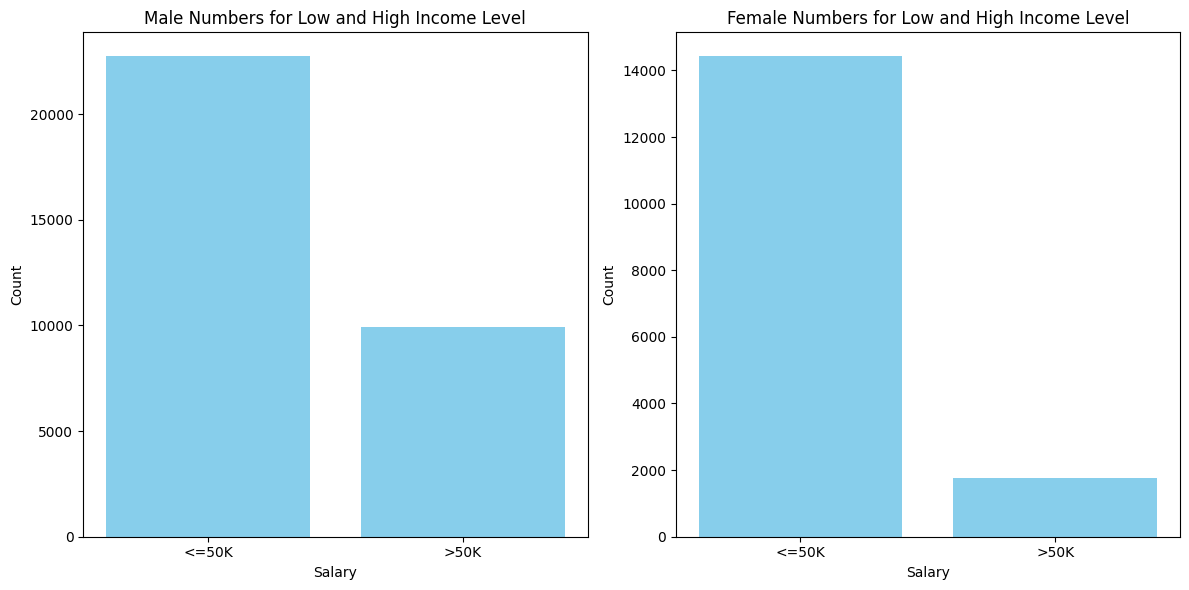

In [ ]:
plt.figure(figsize = (12, 6))

male_data = data[data.sex == ' Male']
female_data = data[data.sex == ' Female']
titles = ['Male Numbers for Low and High Income Level', 'Female Numbers for Low and High Income Level']

for i, (df, title) in enumerate(zip([male_data, female_data], titles), 1):
    plt.subplot(1, 2, i)
    counts = df['salary'].value_counts().sort_index()
    xcoords = range(1, len(counts) + 1)
    plt.bar(xcoords, counts, color = 'skyblue')
    plt.xticks(xcoords, counts.index, rotation = 'vertical' if len(counts) >= 5 else 'horizontal')
    plt.title(title)
    plt.xlabel('Salary')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
data['sex'] = data['sex'].map({' Male':1,' Female':0}).astype(int)

print (data.head(10))

   age          workclass    fnlwgt   education  education-num  \
0   39          State-gov   77516.0   Bachelors           13.0   
1   50   Self-emp-not-inc   83311.0   Bachelors           13.0   
2   38            Private  215646.0     HS-grad            9.0   
3   53            Private  234721.0        11th            7.0   
4   28            Private  338409.0   Bachelors           13.0   
5   37            Private  284582.0     Masters           14.0   
6   49            Private  160187.0         9th            5.0   
7   52   Self-emp-not-inc  209642.0     HS-grad            9.0   
8   31            Private   45781.0     Masters           14.0   
9   42            Private  159449.0   Bachelors           13.0   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cl

In [ ]:
salary_map = {'<=50K':1, '>50K':0}
data['salary'] = data['salary'].map(salary_map).astype(int)

print (data.head(10))

   age          workclass    fnlwgt   education  education-num  \
0   39          State-gov   77516.0   Bachelors           13.0   
1   50   Self-emp-not-inc   83311.0   Bachelors           13.0   
2   38            Private  215646.0     HS-grad            9.0   
3   53            Private  234721.0        11th            7.0   
4   28            Private  338409.0   Bachelors           13.0   
5   37            Private  284582.0     Masters           14.0   
6   49            Private  160187.0         9th            5.0   
7   52   Self-emp-not-inc  209642.0     HS-grad            9.0   
8   31            Private   45781.0     Masters           14.0   
9   42            Private  159449.0   Bachelors           13.0   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cl

In [ ]:
data['country'] = data['native-country'].replace(' ?',np.nan)
data['workclass'] = data['workclass'].replace(' ?',np.nan)
data['occupation'] = data['occupation'].replace(' ?',np.nan)

data.dropna(how = 'any',inplace = True)

print (data.head(10))

   age          workclass    fnlwgt   education  education-num  \
0   39          State-gov   77516.0   Bachelors           13.0   
1   50   Self-emp-not-inc   83311.0   Bachelors           13.0   
2   38            Private  215646.0     HS-grad            9.0   
3   53            Private  234721.0        11th            7.0   
4   28            Private  338409.0   Bachelors           13.0   
5   37            Private  284582.0     Masters           14.0   
6   49            Private  160187.0         9th            5.0   
7   52   Self-emp-not-inc  209642.0     HS-grad            9.0   
8   31            Private   45781.0     Masters           14.0   
9   42            Private  159449.0   Bachelors           13.0   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cl

In [ ]:
def stat_parity(preds, sens):
    outcome_0 = np.sum(preds[sens == 0])
    outcome_1 = np.sum(preds[sens == 1])

    prop_0 = outcome_0 / np.sum(sens == 0)
    prop_1 = outcome_1 / np.sum(sens == 1)

    diff = prop_1 - prop_0

    return diff



def eq_oppo(preds, sens, labels):
    tp_0 = np.sum((preds[sens == 0] == 1) & (labels[sens == 0] == 1))
    tp_1 = np.sum((preds[sens == 1] == 1) & (labels[sens == 1] == 1))

    tpr_0 = tp_0 / np.sum(labels[sens == 0] == 1)
    tpr_1 = tp_1 / np.sum(labels[sens == 1] == 1)

    diff = tpr_1 - tpr_0

    return diff

In [ ]:
columns_to_keep = ['workclass', 'education-num', 'marital-status', 'occupation', 'sex', 'native-country', 'salary']
Features = data[columns_to_keep]
X = Features

X = pd.get_dummies(X, columns = ['workclass', 'marital-status', 'occupation', 'native-country'])

X = X.drop(columns = ['salary'])
y = data['salary']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X , y, test_size = 0.3)

In [ ]:
df_train_adult = pd.concat([x_train, y_train], axis = 0)
df_test_adult = pd.concat([x_test, y_test], axis = 1)

df_test_sens_adult = df_test_adult['sex']
test_sens_adult = df_test_sens_adult.values

test_y_adult = y_test.values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 1
model = LogisticRegression(max_iter = 100)
model.fit(x_train, y_train)
preds = model.predict(x_test)
acc = accuracy_score(y_test, preds)
stat_p = stat_parity(preds, test_sens_adult)
eq_op = eq_oppo(preds, test_sens_adult, y_test)
print(acc, stat_p, eq_op)

0.8248691678337141 -0.211260768191734 -0.10056244248080415


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 2
model = RandomForestClassifier(n_estimators = 100, random_state = 24)
model.fit(x_train, y_train)
preds= model.predict(x_test)
acc = accuracy_score(y_test, preds)
stat_p = stat_parity(preds, test_sens_adult)
eq_op = eq_oppo(preds, test_sens_adult, y_test)
print(acc, stat_p, eq_op)

0.8233950025797891 -0.18328878496329926 -0.08045947794106878


In [ ]:
# 3
model = DecisionTreeClassifier(criterion = 'gini', random_state = 21, max_depth = 10)
model.fit(x_train, y_train)
preds = model.predict(x_test)
acc = accuracy_score(y_test, preds)
stat_p = stat_parity(preds, test_sens_adult)
eq_op = eq_oppo(preds, test_sens_adult, y_test)
print(acc, stat_p, eq_op)


0.8229527530036117 -0.18040564116145752 -0.08376863076700025


In [ ]:
# 4
model = MLPClassifier(max_iter = 100)
model.fit(x_train, y_train)
preds = model.predict(x_test)
acc = accuracy_score(y_test, preds)
stat_p = stat_parity(preds, test_sens_adult)
eq_op = eq_oppo(preds, test_sens_adult, y_test)
print(acc, stat_p, eq_op)

0.8266381661384241 -0.2063329932808191 -0.09213174851190964


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Mitigate bias
x_train_new = x_train.drop(columns = ['sex'])
x_test_new = x_test.drop(columns = ['sex'])

In [ ]:
model = MLPClassifier(max_iter = 100)
model.fit(x_train_new, y_train)
preds = model.predict(x_test_new)
acc = accuracy_score(y_test, preds)
stat_p = stat_parity(preds, test_sens_adult)
eq_op = eq_oppo(preds, test_sens_adult, y_test)
print(acc, stat_p, eq_op)

0.8273752487653866 -0.17833351070599546 -0.07528794606075329


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
df_train_x_syn_adult = x_train.copy()
df_train_x_syn_adult['sex'] = 1 - df_train_x_syn_adult['sex']
df_train_y_syn_adult = y_train.copy()
df_train_x_aug_adult = pd.concat((x_train, df_train_x_syn_adult))
df_train_y_aug_adult = pd.concat((y_train, df_train_y_syn_adult))
train_y_adult = df_train_y_aug_adult.values

In [ ]:
model = MLPClassifier(max_iter = 100)
model.fit(df_train_x_aug_adult, df_train_y_aug_adult)
preds = model.predict(x_test)
acc = accuracy_score(y_test, preds)
stat_p = stat_parity(preds, test_sens_adult)
eq_op = eq_oppo(preds, test_sens_adult, y_test)
print(acc, stat_p, eq_op)

0.8264170413503353 -0.1746016858609698 -0.0714754776902049


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
